<a href="https://colab.research.google.com/github/AbhishekBangde/Graduate-Admission-Prediction-using-Linear-Regression-Jamboree-Education-Project/blob/main/Jamboree_Education_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Jamboree Education - Linear Regression**


## **About Jamboree**

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.


## **Data Description**

* **Serial No.**: This column represents the unique row identifier for each applicant in the
 dataset.
* **GREScores**:This column contains the GRE (Graduate Record Examination) scores of
 the applicants, which are measured on a scale of 0 to 340.
* **TOEFLScores**: This column includes the TOEFL (Test of English as a Foreign Language)
 scores of the applicants, which are measured on a scale of 0 to 120.
* **University Rating**: This column indicates the rating or reputation of the university that
 the applicants are associated with.
 * Therating is based on a scale of 0 to 5, with 5 representing the highest rating.
* **SOP**:This column represents the strength of the applicant's statement of purpose,
 rated on a scale of 0 to 5, with 5 indicating a strong and compelling SOP.
* **LOR**:This column represents the strength of the applicant's letter of recommendation,
 rated on a scale of 0 to 5, with 5 indicating a strong and compelling LOR.
* **CGPA**:This column contains the undergraduate Grade Point Average (GPA) of the
 applicants, which is measured on a scale of 0 to 10.
* Research: This column indicates whether the applicant has research experience (1) or not (0).
* **ChanceofAdmit**: This column represents the estimated probability or chance of
 admission for each applicant, ranging from 0 to 1.


In [ ]:
import pandas as pd     #  Importing essential Libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

### Importing dataset

In [ ]:
url = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv'  # Importing dataset

In [ ]:
df = pd.read_csv(url)  # Loading Dataset
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df.shape  # Checking no of rows and columns

(500, 9)

In [ ]:
df.duplicated().sum()  # Checking for duplicates

np.int64(0)

In [ ]:
df.isnull().sum().sum()  # Checking for Null values

np.int64(0)

In [ ]:
df.drop(['Serial No.'],axis = 1, inplace=True)  # Removing 'Serial No.' column as it ir relevant feature

In [ ]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


# **Univariate Analysis**

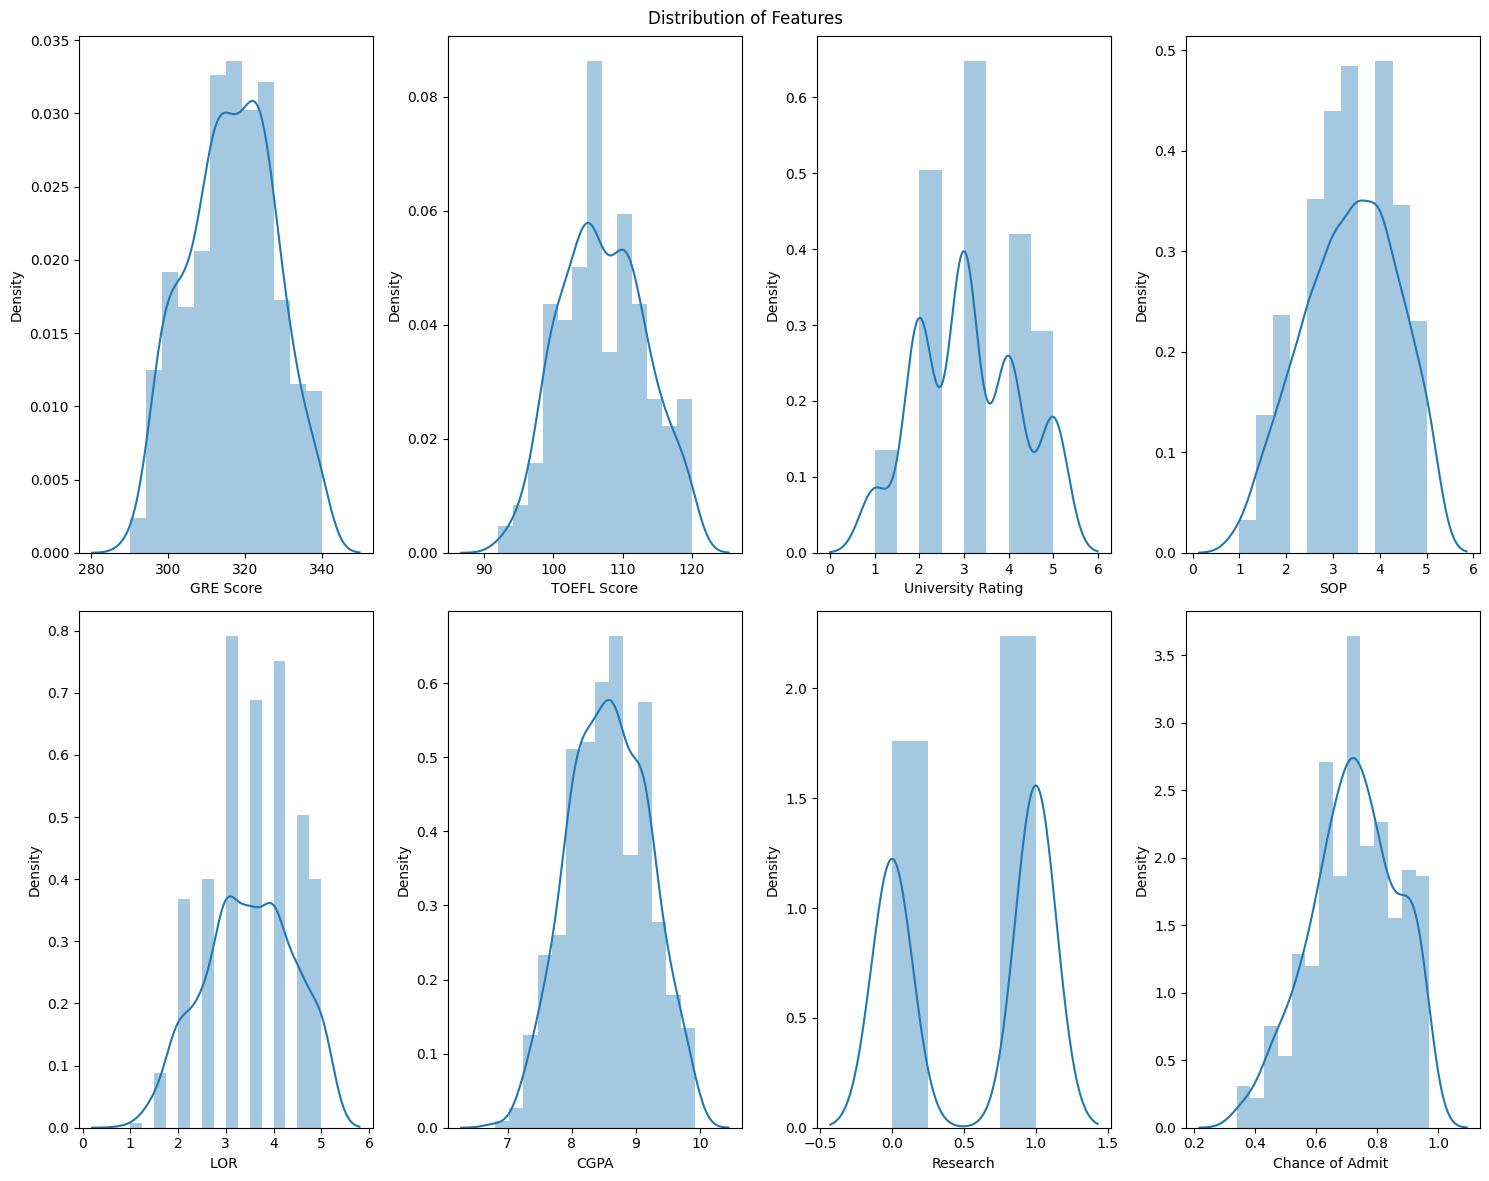

In [ ]:
plt.figure(figsize=(15,12))   # Univariate Analysis - Checking feature distribution


plt.subplot(2,4,1)
sns.distplot(df['GRE Score'], kde=True)

plt.subplot(2,4,2)
sns.distplot(df['TOEFL Score'], kde=True)

plt.subplot(2,4,3)
sns.distplot(df['University Rating'], kde=True)

plt.subplot(2,4,4)
sns.distplot(df['SOP'], kde=True)

plt.subplot(2,4,5)
sns.distplot(df['LOR '], kde=True)

plt.subplot(2,4,6)
sns.distplot(df['CGPA'], kde=True)

plt.subplot(2,4,7)
sns.distplot(df['Research'], kde=True)

plt.subplot(2,4,8)
sns.distplot  (df['Chance of Admit '], kde=True)

plt.suptitle('Distribution of Features')
plt.tight_layout()
plt.show()

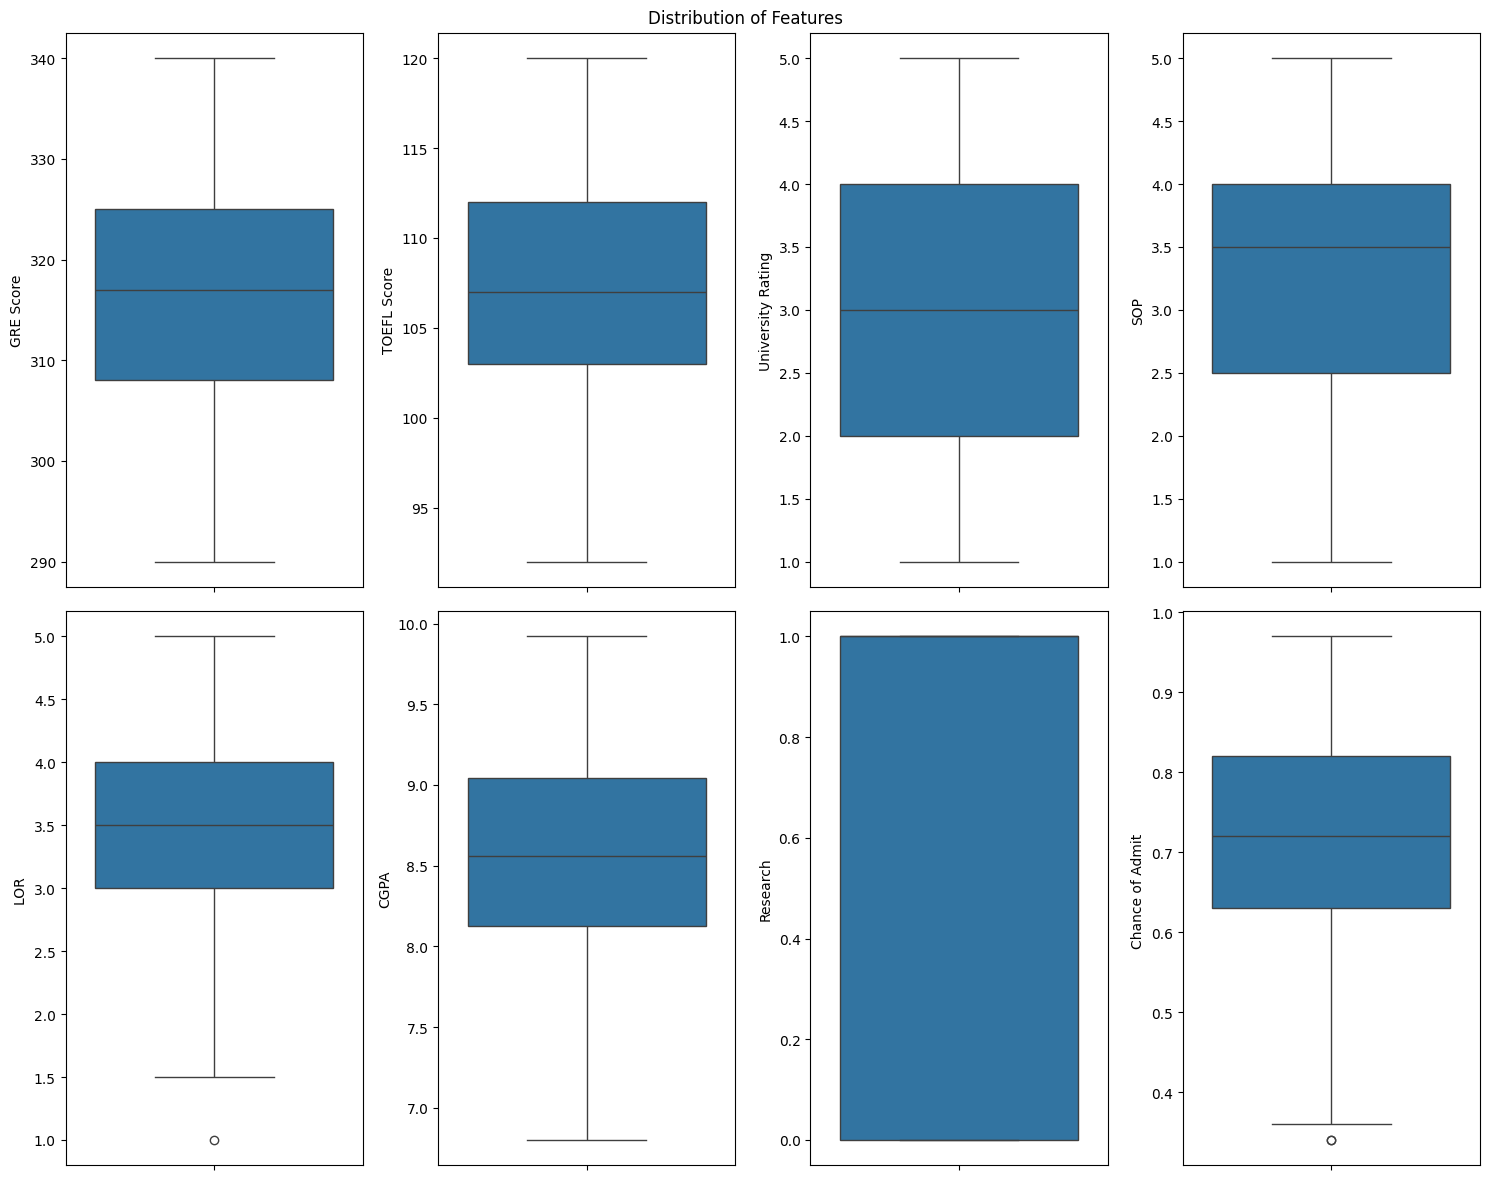

In [ ]:
plt.figure(figsize=(15,12))  # Checking for outliers

plt.subplot(2,4,1)
sns.boxplot(df['GRE Score'])

plt.subplot(2,4,2)
sns.boxplot(df['TOEFL Score'])

plt.subplot(2,4,3)
sns.boxplot(df['University Rating'])

plt.subplot(2,4,4)
sns.boxplot(df['SOP'])

plt.subplot(2,4,5)
sns.boxplot(df['LOR '])

plt.subplot(2,4,6)
sns.boxplot(df['CGPA'])

plt.subplot(2,4,7)
sns.boxplot(df['Research'])

plt.subplot(2,4,8)
sns.boxplot(df['Chance of Admit '])

plt.suptitle('Distribution of Features')
plt.tight_layout()
plt.show()

## There are not outliers in the features

# **Bivariate Analysis**

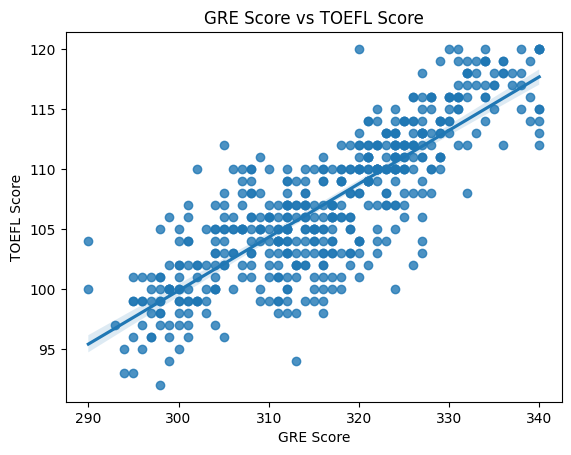

In [ ]:
sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

### People with higher GRE Scores also have higher TOEFL Scores which is justified because both TOEFL and GRE have a verbal section which although not similar are relatable

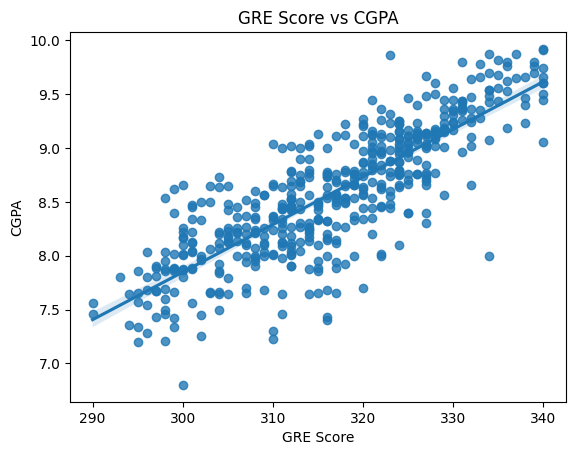

In [ ]:
sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

### Although there are exceptions, people with higher CGPA usually have higher GRE scores maybe because they are smart or hard working

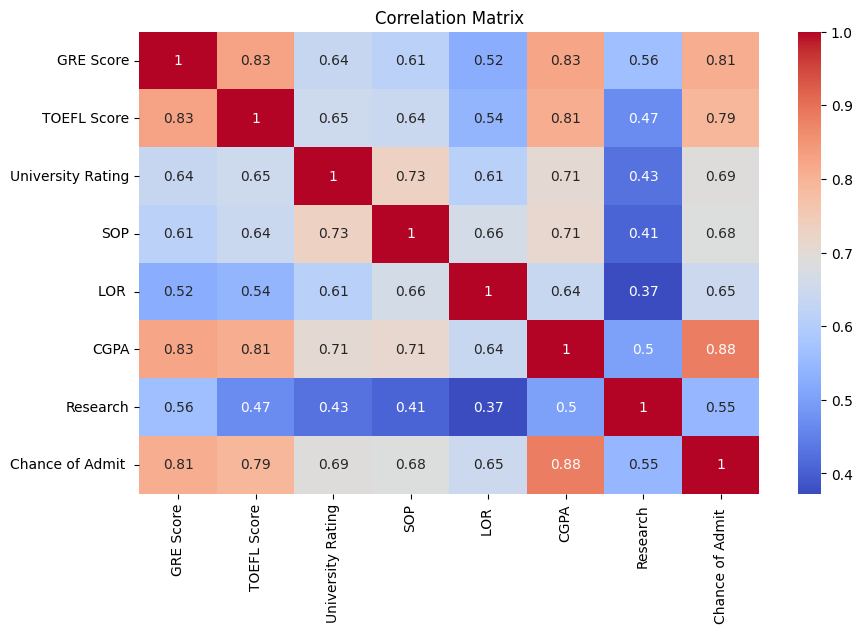

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



*   GRE and CGPA (r = 0.83), GRE and TOEFL (r = 0.83) → High inter-correlation, which may lead to multicollinearity concerns in linear models (though VIF analysis from your earlier model ruled this out).

*   SOP and University Rating (r = 0.73) → Students from better universities tend to submit stronger SOPs.



# **Data Processing**

In [ ]:
X = df.drop(columns='Chance of Admit ')
y = df['Chance of Admit ']
X.shape, y.shape

((500, 7), (500,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 7), (100, 7), (400,), (100,))

# **Standardization**

In [ ]:
X_train_columns = X_train.columns
X_train_columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X_train_columns)
X_test = pd.DataFrame(X_test, columns=X_train_columns)
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.389986,0.602418,-0.098298,0.126796,0.564984,0.415018,0.895434
1,-0.066405,0.602418,0.775459,0.633979,1.651491,-0.067852,-1.116777
2,-1.253022,-0.876917,-0.098298,0.126796,-0.521524,-0.134454,-1.116777
3,-0.248961,-0.055064,-0.972054,-0.887570,0.564984,-0.517420,-1.116777
4,-0.796631,-0.219435,-0.098298,0.126796,-1.064777,-0.617324,0.895434


# **Building the model using OLS ie. Ordinary Least Square**

In [ ]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

ols_model = sm.OLS(np.array(y_train.values), X_train).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Thu, 17 Apr 2025   Prob (F-statistic):          3.41e-142
Time:                        14:52:32   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7242      0.00

In [ ]:
X_train_new=X_train.drop(columns='SOP')

In [ ]:
model1 = sm.OLS(y_train.values, X_train_new).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     300.4
Date:                Thu, 17 Apr 2025   Prob (F-statistic):          2.01e-143
Time:                        14:52:32   Log-Likelihood:                 561.85
No. Observations:                 400   AIC:                            -1110.
Df Residuals:                     393   BIC:                            -1082.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7242      0.00

In [ ]:
X_train_new=X_train_new.drop(columns='University Rating')

model1 = sm.OLS(y_train.values, X_train_new).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     360.8
Date:                Thu, 17 Apr 2025   Prob (F-statistic):          1.36e-144
Time:                        14:52:32   Log-Likelihood:                 561.54
No. Observations:                 400   AIC:                            -1111.
Df Residuals:                     394   BIC:                            -1087.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7242      0.003    241.830      

# **Check for Linear Regression Assumptions**

## **1. Multicolinearity using VIF**

In [ ]:
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

In [ ]:
vif_scores = calculate_vif(X_train_new)
print(vif_scores)

       Feature       VIF
0        const  1.000000
1    GRE Score  4.471557
2  TOEFL Score  3.540082
3         LOR   1.655867
4         CGPA  4.281365
5     Research  1.504670


Since the VIF values are <5 we don't need to mitigate the features

## **2. Linearity of Variables**

In [ ]:
X_test_new=X_test.drop(columns='SOP')
X_test_new=X_test_new.drop(columns='University Rating')

In [ ]:
X_test_new.head()

,const,GRE Score,TOEFL Score,LOR,CGPA,Research
0,1.0,1.576604,1.424271,0.021730,1.597217,0.895434
1,1.0,-0.248961,0.109306,0.564984,0.764683,0.895434
2,1.0,-0.157683,-0.383805,-1.064777,-1.549762,-1.116777
3,1.0,-0.431518,0.273677,-0.521524,0.181909,-1.116777
4,1.0,0.846378,0.766789,-0.521524,0.781333,0.895434


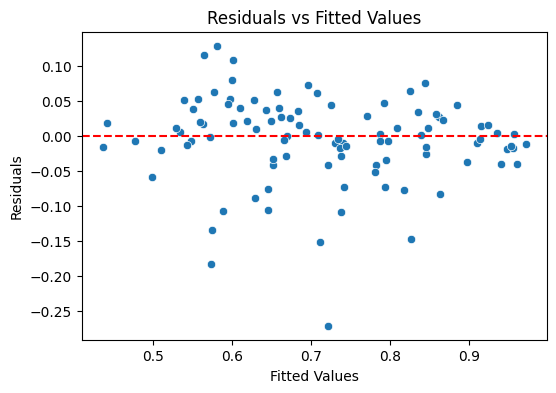

In [ ]:
y_pred = model1.predict(X_test_new)
residuals = y_test.values-y_pred

# Residual plot (Linearity)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

### The absence of any clear pattern or trend in the residual plot suggests that the linearity assumption of the variables holds.

In [ ]:
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -0.005305947942349201


## **3. Homoscedasticity**

### H0 = 'Homoscedasticity'
### Ha = 'Heteroscedasticity'

In [ ]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

gq_test = het_goldfeldquandt(model1.resid, model1.model.exog)
gq_test_statistic = gq_test[0]
gq_p_value = gq_test[1]

print("Goldfeld-Quandt Test Statistic:", gq_test_statistic)
print("p-value:", gq_p_value)

Goldfeld-Quandt Test Statistic: 0.9592288620962851
p-value: 0.6139024845884404


### Since 0.613 > 0.05, Failed to reject H0, Therfore there is no Heteroscedasticity

## **4. Normality of residuals**

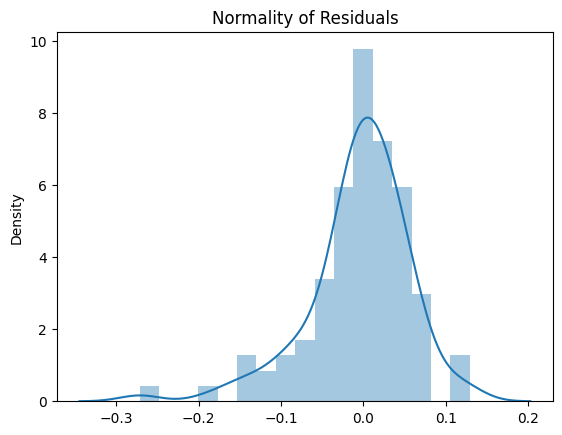

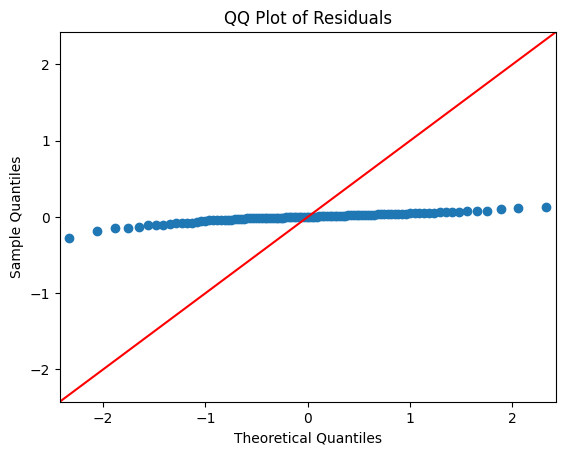

In [ ]:
# Normality of residuals
sns.distplot(residuals, kde=True)
plt.title("Normality of Residuals")
plt.show()

# QQ Plot
sm.qqplot(residuals, line='45')
plt.title("QQ Plot of Residuals")
plt.show()


In [ ]:
shapiro_stat, shapiro_p_value = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p_value}')

if shapiro_p_value > 0.05:
    print("Fail to reject the null hypothesis: Residuals are normally distributed.")
else:
    print("Reject the null hypothesis: Residuals are not normally distributed.")

Shapiro-Wilk Test Statistic: 0.9232878989947897, p-value: 2.1122435647001375e-05
Reject the null hypothesis: Residuals are not normally distributed.


# **Other Linear Regression Model -**


*   Using scikit learn Library
*   Lasso
*   Ridge

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print("Train Performance:")
    print("MAE:", mean_absolute_error(y_train, y_train_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print("R²:", r2_score(y_train, y_train_pred))

    print("\nTest Performance:")
    print("MAE:", mean_absolute_error(y_test, y_test_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
    print("R²:", r2_score(y_test, y_test_pred))

# For sklearn models
evaluate_model(lr, X_train, y_train, X_test, y_test)


Train Performance:
MAE: 0.042533340611643135
RMSE: 0.05938480848210051
R²: 0.8210671369321554

Test Performance:
MAE: 0.0427226542770537
RMSE: 0.06086588041578313
R²: 0.8188432567829628


In [ ]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

evaluate_model(lasso_model, X_train, y_train, X_test, y_test)

Train Performance:
MAE: 0.09722717920840805
RMSE: 0.12046551799037725
R²: 0.26368288487651204

Test Performance:
MAE: 0.09814820022893947
RMSE: 0.12242927166741772
R²: 0.2670451559406176


In [ ]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

evaluate_model(ridge_model, X_train, y_train, X_test, y_test)

Train Performance:
MAE: 0.04253292553383819
RMSE: 0.05938481525895057
R²: 0.8210670960933859

Test Performance:
MAE: 0.04272516897796875
RMSE: 0.0608667948670209
R²: 0.8188378133308557


Text(0, 0.5, 'y_pred')

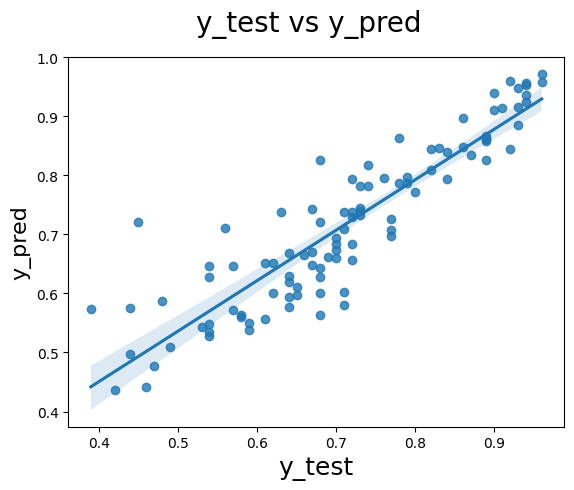

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.regplot(x=y_test.values, y=y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

# **Key Insights and Recommendations**


---

## 🔍 Key Insights

1. **Strong Predictors of Admission**:
   - **CGPA** has the highest impact on the chance of admission (`coef = 0.0691`, `p < 0.001`).
   - **GRE Score**, **TOEFL Score**, **LOR**, and **Research** experience are also statistically significant predictors (`p < 0.05`).

2. **Moderate or Insignificant Predictors**:
   - **University Rating** and **SOP** show high p-values (`> 0.05`), indicating **less statistical influence** on the admission outcome in this dataset.

3. **Model Performance**:
   - **Linear Regression** and **Ridge Regression** models performed well, with:
     - **R² ~ 0.82** on both train and test sets.
   - **Lasso Regression** performed poorly due to over-regularization.

4. **Validation of Assumptions**:
   - ✅ No multicollinearity (All VIF < 5)
   - ✅ Linearity and Homoscedasticity satisfied
   - ❌ Residuals **not normally distributed**, which may affect inference slightly.

---

## ✅ Recommendations

1. **Focus on CGPA and Standardized Tests**:
   - Students should prioritize improving **CGPA**, **GRE**, and **TOEFL** scores to enhance their admission chances.

2. **Encourage Research Participation**:
   - Having research experience is statistically significant and positively influences admission chances.

3. **Evaluate SOP and University Rating Further**:
   - Their low statistical impact may be due to:
     - A qualitative nature not captured by the data
     - Need for more detailed metrics or subjective evaluations



4. **Handle Non-Normal Residuals**:
   - Use transformations or robust regression techniques if inference is critical to address **non-normality** in residuals.

---

